**VISU 1 - Sysarmy**

In [1]:
!pip install pandas==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.4.2 which is incompatible.


In [2]:
import pandas as pd

In [3]:
# Change the file directory to yours, the files are in a public folder in google drive:
# https://drive.google.com/drive/folders/1CsvJs0xZ9SCLtG4ci2dNGCkhqnI-1DLS?usp=drive_link
df_graph = pd.read_csv('/content/drive/MyDrive/2022/Orga_de_Datos/Datasets/sysarmy_remuneracion_salarial_argentina.csv', usecols=['Salario mensual o retiro BRUTO (en tu moneda local)', 'Me identifico (género)', 'Pagos en dólares'])

In [4]:
df_graph.columns = ['salario_mensual_bruto', 'dolares', 'genero']

In [5]:
df_graph = df_graph[df_graph['dolares'].isnull()]
df_graph = df_graph[['salario_mensual_bruto', 'genero']]

In [6]:
similar_varon_cis = {'Hombre', 'Varón', 'Varon', 'Masculino'}
similar_mujer_cis = {'Mujer', 'mujer'}

def merge_genders(x):
  if x['genero'] in similar_varon_cis:
    return 'Varón Cis'
  if x['genero'] in similar_mujer_cis:
    return 'Mujer Cis'
  return x['genero']

df_graph['genero'] = df_graph.apply(merge_genders, axis=1)

In [7]:
generos = {'Varón Cis', 'Mujer Cis'}
df_graph = df_graph[df_graph['genero'].isin(generos)] #Me quedo con las categorías que me interesan

In [8]:
df_graph = df_graph[pd.to_numeric(df_graph['salario_mensual_bruto'], errors='coerce').notnull()]

df_graph['salario_mensual_bruto'] = df_graph['salario_mensual_bruto'].astype(float)
df_graph['genero'] = df_graph['genero'].astype(str)

In [9]:
df_graph = df_graph[(df_graph['salario_mensual_bruto'] > 50000) & (df_graph['salario_mensual_bruto'] < 600000)]

In [12]:
!pip install matplotlib==3.5.2
!pip install seaborn==0.11.2

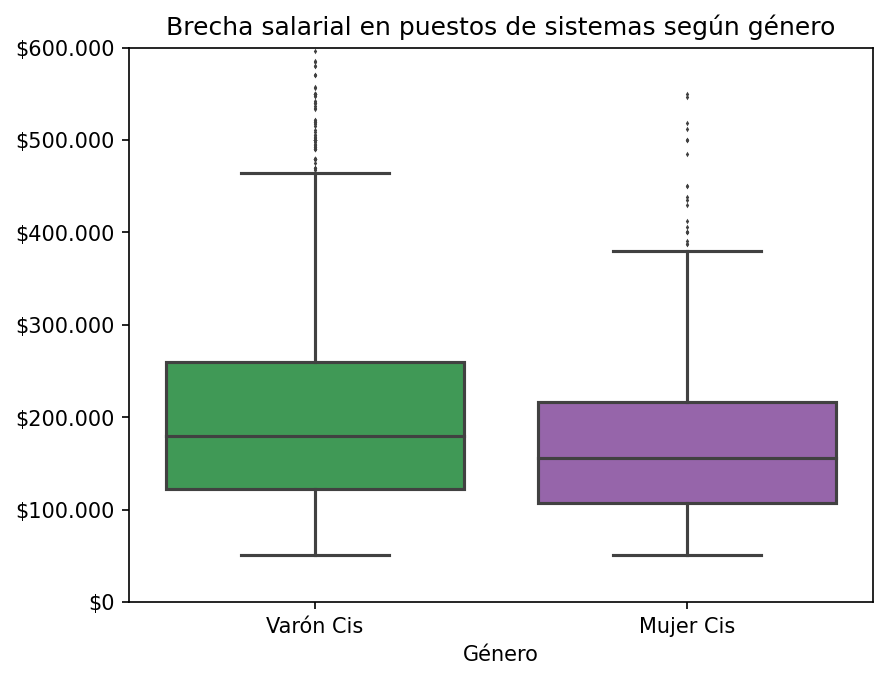

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=150)
plt.title("Brecha salarial en puestos de sistemas según género")

pal = ["#31a84e", "#9b59b6"]
sns.set_palette(pal)
ax = sns.boxplot(data=df_graph, x='genero', y='salario_mensual_bruto', fliersize=0.5)
ax.set_ylabel("")
ax.set_xlabel("Género")
ax.set_ylim(0, 60000)
plt.yticks(range(000000,600001,100000), ["$0", "$100.000", "$200.000", "$300.000", "$400.000", "$500.000", "$600.000"])

plt.show()